# Initialize code

In [1]:
import os
import math

# Numbers and dataframes
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

# Visualization
import dtale
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

# # Ignore Warnings
# import warnings
# warnings.filterwarnings("ignore")

#%% Initialize settings and contstants:
np.set_printoptions(precision=2, suppress=True)
pd.set_option('display.max_columns', 20)




Read mongodb data

In [2]:
from pymongo import MongoClient
from datetime import datetime, timezone
import tzlocal

DB_NAME = "scrapy_rentals"
COLLECTION_NAME = "spider_finn"
QUERY = {
    'meta.time_parsed': {
        '$gt': datetime(2020, 7, 28, 14, 0, 0, tzinfo=timezone.utc)
    }
}

def _connect_mongo(host, port, username, password, db):
    """ A util for making a connection to mongo """
    if username and password:
        mongo_uri = 'mongodb://%s:%s@%s:%s/%s' % (username, password, host, port, db)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)
    return conn[db]


def read_mongo(db, collection, query=QUERY, host='localhost', port=27017, username=None, password=None, no_id=True):
    """ Read from Mongo and Store into DataFrame """
    db = _connect_mongo(host=host, port=port, username=username, password=password, db=db)
    cursor = db[collection].find(query)
    df =  json_normalize(list(cursor), record_prefix="", meta_prefix="")
    if no_id:
        del df['_id']
    return df


In [3]:
df = read_mongo(DB_NAME, COLLECTION_NAME)

print(df.shape)
print(df.dtypes)


(931, 24)
url                                       object
address                                   object
price                                      int64
price_type                                object
title                                     object
traits                                    object
geo_lat                                  float64
geo_lng                                  float64
key_fields.depositum                     float64
key_fields.primærrom                     float64
key_fields.soverom                         int64
key_fields.boligtype                      object
key_fields.leieperiode                    object
key_fields.last_change            datetime64[ns]
meta.time_parsed                  datetime64[ns]
meta.git_version                  datetime64[ns]
key_fields.inkluderer                     object
key_fields.etasje                        float64
key_fields.energimerking                  object
key_fields.oppvarmingskarakter            object
key_fields

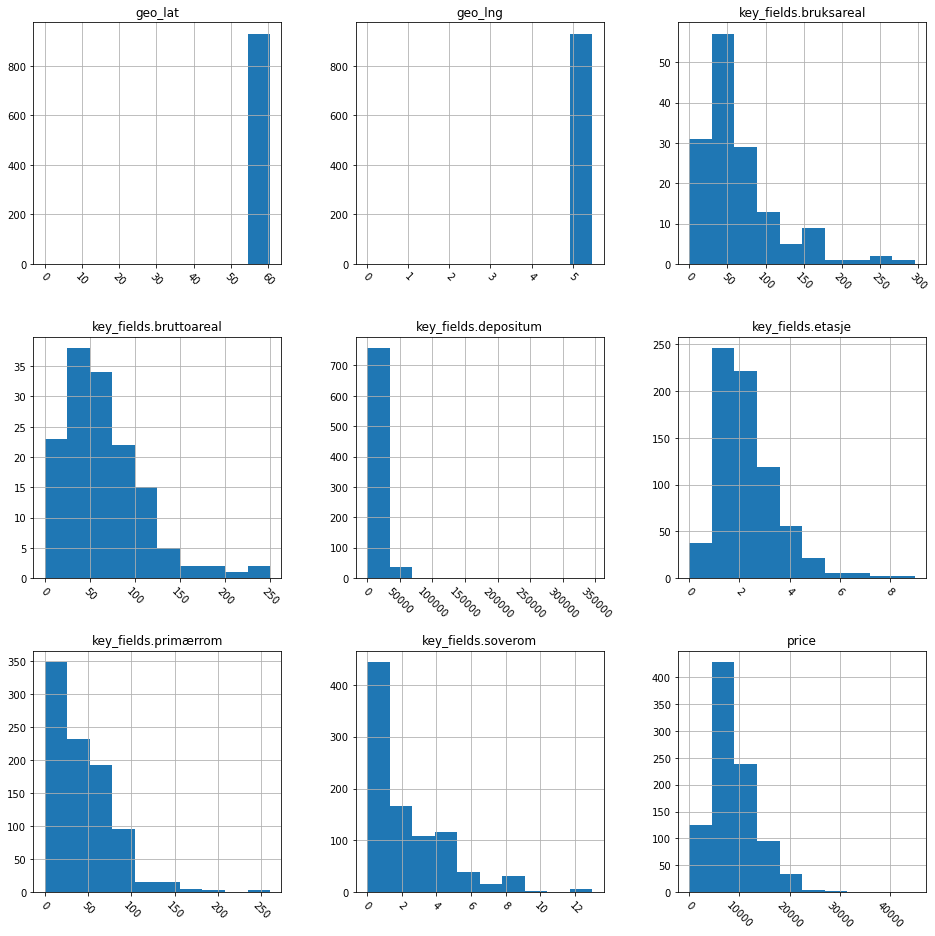

In [4]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress
plt.show() # Clear the text "residue"

# Reshape and restructure

In [7]:
df['area'] = df[['key_fields.bruksareal', 'key_fields.primærrom', 'key_fields.bruttoareal']].min(axis=1)
df.drop(columns=['key_fields.bruksareal', 'key_fields.primærrom', 'key_fields.bruttoareal'])

,url,address,price,price_type,title,traits,geo_lat,geo_lng,key_fields.depositum,key_fields.soverom,...,key_fields.last_change,meta.time_parsed,meta.git_version,key_fields.inkluderer,key_fields.etasje,key_fields.energimerking,key_fields.oppvarmingskarakter,key_fields.dyrehold_tillatt,expired,area
0,https://www.finn.no/realestate/lettings/ad.htm...,"LYDER SAGENS GATE 9, 5008 Bergen",5500,Månedsleie,Svært sentralt beliggenhet LS9,"[Møblert, Bredbåndstilknytning, Moderne, Parke...",60.388042,5.330302,1.0,1,...,2020-07-26 08:04:00,2020-07-28 17:41:49.367,2020-07-28 14:12:30,NaN,NaN,NaN,NaN,NaN,NaN,16.0
1,https://www.finn.no/realestate/lettings/ad.htm...,"NYGÅRDSGATEN 62, 5008 Bergen",4900,Månedsleie,Nygårdshøyden. Ledige rom da studenter ikke ha...,[Delvis møblert],60.387165,5.329304,4900.0,9,...,2020-07-28 08:39:00,2020-07-28 17:41:49.385,2020-07-28 14:12:30,Internett,2.0,NaN,NaN,NaN,NaN,10.0
2,https://www.finn.no/realestate/lettings/ad.htm...,"CORT PIIL-SMAUET 4, 5005 Bergen",4200,Månedsleie,Store rom i sentrum - halv leie i august,"[Delvis møblert, Balkong/Terrasse, Bredbåndsti...",60.395283,5.316527,4200.0,12,...,2020-07-28 08:36:00,2020-07-28 17:41:49.402,2020-07-28 14:12:30,Internett,2.0,NaN,NaN,NaN,NaN,14.0
3,https://www.finn.no/realestate/lettings/ad.htm...,"Kalvedalsveien 49 A, 5022 Bergen",4500,Månedsleie,Flotte rom til leie i 5 mannskollektiv i KALVE...,"[Delvis møblert, Bredbåndstilknytning, Ingen g...",60.384354,5.353969,4500.0,5,...,2020-07-28 08:40:00,2020-07-28 17:41:49.431,2020-07-28 14:12:30,Internett i form av fiber,1.0,NaN,NaN,NaN,NaN,15.0
4,https://www.finn.no/realestate/lettings/ad.htm...,"TEATERGATEN 20, 5010 Bergen",4400,Månedsleie,1 rom igjen i nyoppusset kollektiv i sentrum -...,"[Delvis møblert, Bredbåndstilknytning, Moderne...",60.391850,5.318214,4400.0,9,...,2020-07-28 08:42:00,2020-07-28 17:41:49.579,2020-07-28 14:12:30,Internett,3.0,NaN,NaN,NaN,NaN,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,https://www.finn.no/realestate/lettings/ad.htm...,"Eikåslia 8, 5131 Nyborg",10000,Månedsleie,Nyoppusset stor godkjent sokkelleilighet til leie,"[Delvis møblert, Aircondition, Barnevennlig, B...",60.483690,5.354935,20000.0,2,...,2020-07-28 16:40:00,2020-07-28 17:42:29.896,2020-07-28 14:12:30,Bredbånd,1.0,NaN,NaN,NaN,NaN,78.0
927,https://www.finn.no/realestate/lettings/ad.htm...,"Lille Øvregaten 36C, 5018 Bergen",14000,Månedsleie,Attraktiv leilighet til leie - sentral beligge...,"[Møblert, Bredbåndstilknytning, Kabel-TV, Park...",60.393604,5.332623,7000.0,1,...,2020-07-28 17:39:00,2020-07-28 17:42:29.924,2020-07-28 14:12:30,"KabelTV, bredbånd",2.0,NaN,NaN,NaN,NaN,38.0
928,https://www.finn.no/realestate/lettings/ad.htm...,"GRØGÅRDS GATE 4, 5033 Bergen",18000,Månedsleie,Nyoppusset 3-roms leilighet i Sentrum/Sandviken,"[Møblert, Alarm, Barnevennlig, Bredbåndstilkny...",60.401398,5.325060,54000.0,2,...,2020-07-28 17:16:00,2020-07-28 17:42:29.946,2020-07-28 14:12:30,"Strøm, internett, kabel-tv.",3.0,NaN,NaN,NaN,NaN,46.0
929,https://www.finn.no/realestate/lettings/ad.htm...,"Sollsmittet 11 D, 5136 Mjølkeråen",13900,Månedsleie,MJØLKERÅEN Del av enebolig med 3 soverom og ...,"[Kabel-TV, Hage, Garasje/P-plass, Umøblert, Pe...",60.483080,5.277745,NaN,3,...,2020-07-28 17:06:00,2020-07-28 17:42:29.977,2020-07-28 14:12:30,NaN,NaN,G,NaN,NaN,NaN,NaN


In [6]:
df.head()

,url,address,price,price_type,title,traits,geo_lat,geo_lng,key_fields.depositum,key_fields.primærrom,...,meta.time_parsed,meta.git_version,key_fields.inkluderer,key_fields.etasje,key_fields.energimerking,key_fields.oppvarmingskarakter,key_fields.bruksareal,key_fields.bruttoareal,key_fields.dyrehold_tillatt,expired
0,https://www.finn.no/realestate/lettings/ad.htm...,"LYDER SAGENS GATE 9, 5008 Bergen",5500,Månedsleie,Svært sentralt beliggenhet LS9,"[Møblert, Bredbåndstilknytning, Moderne, Parke...",60.388042,5.330302,1.0,16.0,...,2020-07-28 17:41:49.367,2020-07-28 14:12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.finn.no/realestate/lettings/ad.htm...,"NYGÅRDSGATEN 62, 5008 Bergen",4900,Månedsleie,Nygårdshøyden. Ledige rom da studenter ikke ha...,[Delvis møblert],60.387165,5.329304,4900.0,10.0,...,2020-07-28 17:41:49.385,2020-07-28 14:12:30,Internett,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.finn.no/realestate/lettings/ad.htm...,"CORT PIIL-SMAUET 4, 5005 Bergen",4200,Månedsleie,Store rom i sentrum - halv leie i august,"[Delvis møblert, Balkong/Terrasse, Bredbåndsti...",60.395283,5.316527,4200.0,14.0,...,2020-07-28 17:41:49.402,2020-07-28 14:12:30,Internett,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.finn.no/realestate/lettings/ad.htm...,"Kalvedalsveien 49 A, 5022 Bergen",4500,Månedsleie,Flotte rom til leie i 5 mannskollektiv i KALVE...,"[Delvis møblert, Bredbåndstilknytning, Ingen g...",60.384354,5.353969,4500.0,15.0,...,2020-07-28 17:41:49.431,2020-07-28 14:12:30,Internett i form av fiber,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.finn.no/realestate/lettings/ad.htm...,"TEATERGATEN 20, 5010 Bergen",4400,Månedsleie,1 rom igjen i nyoppusset kollektiv i sentrum -...,"[Delvis møblert, Bredbåndstilknytning, Moderne...",60.391850,5.318214,4400.0,12.0,...,2020-07-28 17:41:49.579,2020-07-28 14:12:30,Internett,3.0,NaN,NaN,NaN,NaN,NaN,NaN
